## Description of Dataset
This dataset has 699 breast cancer samples. Each sample includes a code,  9 attributes and a target value as below.

1. Sample code number: id number
2. Clump Thickness: 1 - 10
3. Uniformity of Cell Size: 1 - 10
4. Uniformity of Cell Shape: 1 - 10
5. Marginal Adhesion: 1 - 10
6. Single Epithelial Cell Size: 1 - 10
7. Bare Nuclei: 1 - 10
8. Bland Chromatin: 1 - 10
9. Normal Nucleoli: 1 - 10
10. Mitoses: 1 - 10
11. Class: (2 for benign, 4 for malignant)

This dataset was extracted from the UCI machine learning repository.Data has been gathered periodically between 1989 and 1991 in seveal groups.

[Reference](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)
## Summary
In this assignment, notebook submited in week 7, for decision tree assignment was reused to conduct optimization on its model. Unnecessary lines deleted from that notebook and focused on optimization of model. We had "mean accuracies" of decision tree model (with the manually selected hyperprameters and different size of cross validation folds (cv)) from assignment 7 submission. Then for the purpose of this assignment optimum hyperprameters (including `criterion`, `min_samples_leaf` and `min_samples_split`) were found using `GridSearchCV` function. Then, effect of changing cross validation number of folds was evaluated. Finally, several folding numbers (`cv`) in cross valication were tried and hyperpramaters were found for each `cv`. It was found that the best combination of hyerprameters for our model is `cv = 2`, `criterion : entropy`, `min_samples_leaf : 5` and `min_samples_split : 2`.  


## Loading Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

## Summary of data preparation and decision tree modeling from assignment 7.
Some data preparation was conducted on the raw dataset.Trained Models were evaluated by calculation of accuracy and visualizations. Best combinations of decision tree signatures which were tried previously was used to train decision tree models with different Train-Test split ratio. Finally results were stored in a dataframe and accuracy vs Train Test split ratio diagram was drawn. 

### Data Preparation

In [2]:
col_names = ['Sample_code', 'Clump_Thickness ', 'Uniformity_Cell_Size', 'Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

In [3]:
df1 = pd.read_csv('data/breast_cancer_wisconsin.csv', names = col_names, index_col= 'Sample_code')

In [4]:
df1.head()

,Clump_Thickness,Uniformity_Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_code,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
#dropping any rows with "?" parameter
df1 = df1[~(df1 == '?').any(axis=1)]

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [6]:
df1.Class.replace(value= ['Benign', 'Malignant'], to_replace=[2, 4], inplace=True)

In [7]:
#convert class datatype from int to str
df1.Class= df1.Class.astype('str')

In [8]:
# Replacing classes number by their name
df1.Class.replace(value= ['Benign', 'Malignant'], to_replace=['2', '4'], inplace=True)

In [9]:
df1_percent = df1['Class'].value_counts(normalize=True).reset_index()

### Modeling
Train a decision tree on 20%, 30%, … , 80% of the data, using one of the training parameter combinations I tried before in the assignment 7 and worked the best.

In [10]:
#making empty list for the dictionary "d"
ls_train_pct=[]
ls_n_train_samples=[]
ls_n_test_samples=[]
ls_train_acc=[]
ls_test_acc=[]

for train_size in range(2,9):
    train_size=train_size/10
    X_train, X_test, y_train, y_test = train_test_split (df1.values[:, :9].astype('int'),
                      df1.values[:, 9],train_size = train_size,random_state=0) 
    dt = tree.DecisionTreeClassifier(random_state=0,min_samples_leaf = 3, criterion='entropy', min_samples_split= 4)
    dt.fit(X_train, y_train)
    train_acc= dt.score(X_train, y_train)
    test_acc = dt.score(X_test, y_test)
    n_train_samples = X_train.shape[0]
    n_test_samples= X_test.shape[0]
    
    ls_train_pct.append(train_size)
    ls_n_train_samples.append(n_train_samples)
    ls_n_test_samples.append(n_test_samples)
    ls_train_acc.append(train_acc)
    ls_test_acc.append(test_acc)

In [11]:
#final dictionary including all splits' results
d = {'train_pct': ls_train_pct, 'n_train_samples': ls_n_train_samples, 'n_test_samples': ls_n_test_samples , 'train_acc':ls_train_acc, 'test_acc': ls_test_acc}

In [12]:
#Making a dataframe from dict
df_results = pd.DataFrame(data=d)

In [13]:
df_results.head()

,train_pct,n_train_samples,n_test_samples,train_acc,test_acc
0,0.2,136,547,0.992647,0.950640
1,0.3,204,479,0.980392,0.956159
2,0.4,273,410,0.981685,0.941463
3,0.5,341,342,0.991202,0.950292
4,0.6,409,274,0.987775,0.941606


**Now plot the accuracies vs training percentage.**

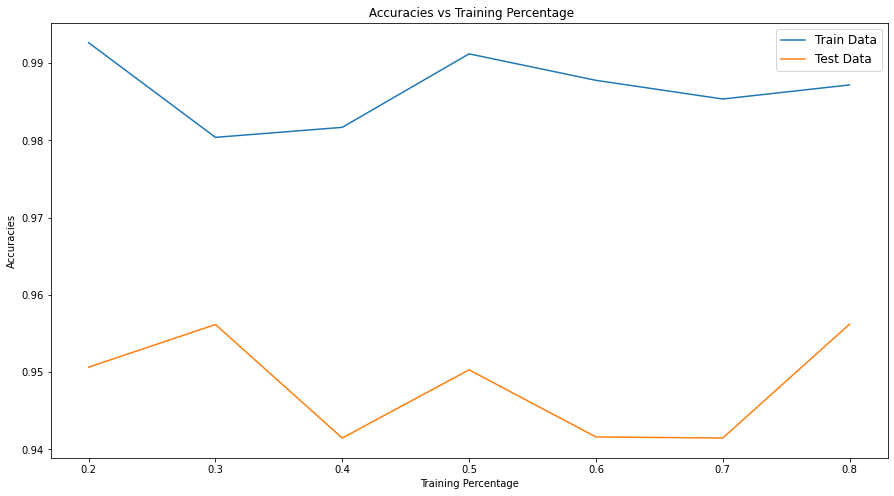

In [14]:
fig,ax = plt.subplots(figsize=(15,8))

ax.plot(df_results.train_pct,df_results.train_acc, label = 'Train Data')
ax.plot(df_results.train_pct,df_results.test_acc, label = 'Test Data')


ax.set_title(' Accuracies vs Training Percentage')
ax.set_xlabel('Training Percentage')
ax.set_ylabel('Accuracies')

ax.legend(fontsize= 'large')

According to the above plot, the accuracy of classification was not very affected by the train_test splitting ratios.

### Optimnization of Decisionb Tree Model for a More Accurate Classification

In [15]:
#Instantiating decision tree model object
dt1 = tree.DecisionTreeClassifier(random_state=0)

In [16]:
#numpy array of X and y data
X = df1.values[:, :9]
y = df1.values[:, 9]

To make a gridsearch optimization we need to have a ditionary of "param_grid" which enables searching over any sequence of parameter settings. when we manually tried to optimize the decision tree model we reached to the following combination of keywords:`min_samples_leaf = 3, criterion='entropy', min_samples_split= 4`. To see what combination would be recommended by gridsearch we make a list of options for each keyword.

In [17]:
param_grid = {'min_samples_leaf' : [1,2,3,4,5], 'criterion' : ['entropy', 'gini'], 'min_samples_split': [1,2,3,4,5,6]}


In [31]:
#instantiating an object for GridSearchCV on dt1 model with specified param_grid
dt_opt = GridSearchCV(dt1,param_grid)

In [19]:
#training GridSearchCV object (dt_opt)
dt_opt.fit(X,y)

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5, 6]})

In [20]:
#results of GridSearchCV in the form of a dataframe
opt_df = pd.DataFrame(dt_opt.cv_results_)
opt_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002192,0.000555,0.000000,0.000000,entropy,1,1,"{'criterion': 'entropy', 'min_samples_leaf': 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,60
1,0.002183,0.000116,0.000693,0.000051,entropy,1,2,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.912409,0.927007,0.941606,0.955882,0.926471,0.932675,0.014830,42
2,0.002071,0.000057,0.000664,0.000017,entropy,1,3,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.912409,0.927007,0.941606,0.955882,0.926471,0.932675,0.014830,42
3,0.002181,0.000229,0.000640,0.000020,entropy,1,4,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.897810,0.927007,0.948905,0.955882,0.926471,0.931215,0.020384,46
4,0.001995,0.000063,0.000618,0.000008,entropy,1,5,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.912409,0.927007,0.948905,0.955882,0.926471,0.934135,0.015954,41
5,0.001989,0.000069,0.000618,0.000008,entropy,1,6,"{'criterion': 'entropy', 'min_samples_leaf': 1...",0.905109,0.927007,0.934307,0.955882,0.933824,0.931226,0.016273,44
6,0.001532,0.000097,0.000000,0.000000,entropy,2,1,"{'criterion': 'entropy', 'min_samples_leaf': 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
7,0.002039,0.000067,0.000620,0.000007,entropy,2,2,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.890511,0.927007,0.941606,0.955882,0.911765,0.925354,0.022793,48
8,0.001773,0.000122,0.000560,0.000049,entropy,2,3,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.890511,0.927007,0.941606,0.955882,0.911765,0.925354,0.022793,48
9,0.001851,0.000120,0.000582,0.000055,entropy,2,4,"{'criterion': 'entropy', 'min_samples_leaf': 2...",0.890511,0.927007,0.941606,0.955882,0.911765,0.925354,0.022793,48


As we can see below, there are 60 different combinations of parameters in the grid search.

In [21]:
opt_df.shape

(60, 16)

As we can see above the best test score was 0.950268 which was achive for three different combinations of keywords. `criterion : gini min_samples_leaf : 4 min_samples_split : 2,3,4`. Here score is the mean accuracy which is average of accuracy for 5 folds (cv = 5) in cross valication process.

Why test score of some rows is NaN?

In [22]:
print(f'Best parameters {dt_opt.best_params_}')
# dt_opt.best_params_

Best parameters {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2}


Here we can see the a totally different combination of those three keywords is recommended by gridseach optimizer, in comparison with manual method. Not only `'min_samples_leaf': 4, 'min_samples_split': 2` have different values, but also criterion changed as well. 
An interesting point is that, the optimized model with `'min_samples_leaf': 4, 'min_samples_split': 2` and `cv = 5`, has lower accuracy than unoptimized model with `min_samples_leaf = 3, criterion='entropy', min_samples_split= 4` and `cv = 2`. It means that `cv` should be selected as one of the parameters in `param_grid` as well.

Why `'min_samples_split': 2` was demonstarted as the optimum value, while all `min_samples_split : 2,3,4` led to the same score?

In [23]:
dt_opt.best_estimator_.predict(X)

array(['Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Malignant', 'Malignant', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Malignant', 'Malignant',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Benign', 'Benign', 'Benign', 'Malignant', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Benign', 'Malignant',
       'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Malignant', 'Malignant', 'Benign',
       'Benign', 'Benign', 'Benign', 'Benign'

Below we make a loop to try several cv size and get lists of best hyperprameters and corresponding mean accuracies out of each cv size(in each iteration).

In [24]:
cv_sizes = []
best_parameters_scores = []
criterions = []
min_samples_leaves = []
min_samples_splits = []

for cv in range (2,9):
    dt_opt = GridSearchCV(dt1,param_grid, cv=cv)
    dt_opt.fit(X,y)
    cv_sizes.append(cv)
    best_parameters_scores.append(dt_opt.best_score_)
    criterions.append(dt_opt.best_params_['criterion'])
    min_samples_leaves.append(dt_opt.best_params_['min_samples_leaf'])
    min_samples_splits.append(dt_opt.best_params_['min_samples_split'])
    

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/tree/_classes.py", line 231, in fit
    % self.min_samples_split)
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
/home/masoud/anaconda3/envs/csc310/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWa

In [27]:
#Dictionary containing best hyperprameters of each cv_size
d = {'cv_size' : cv_sizes,'best_parameters_scores' : best_parameters_scores , 'criterions' : criterions, 'min_samples_leaves' : min_samples_leaves, 'min_samples_splits' : min_samples_splits}

In [28]:
#Making a dataframe of above disctionary
df_results = pd.DataFrame(data=d)

As we can see below by selecting different sizes for the number of folds in a cross validation, it will lead to different values for hyperpramters. According to the below table the best mean accuracy was 0.966, and achived for `cv = 2`, with `criterion : entropy, min_samples_leaf : 5 min_samples_split : 2`. While when we used a default value (`cv = 5`), it led to best mean accuracy of 0.95 with `'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2`.

In [29]:
df_results.head(10)

,cv_size,best_parameters_scores,criterions,min_samples_leaves,min_samples_splits
0,2,0.966336,entropy,5,2
1,3,0.947291,gini,5,2
2,4,0.950198,gini,5,2
3,5,0.950268,gini,4,2
4,6,0.953126,entropy,4,2
5,7,0.951775,gini,1,5
6,8,0.954702,entropy,3,2


By the following code we can see the optimum combination of hyperprameters which leads to the highest mean accuracy.

In [30]:
optimized_parameters = df_results.iloc[[df_results.best_parameters_scores.argmax()]]
optimized_parameters

,cv_size,best_parameters_scores,criterions,min_samples_leaves,min_samples_splits
0,2,0.966336,entropy,5,2
